In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import constants

plt.rcParams["font.family"] = "FreeSerif"
plt.rcParams["font.size"] = 13

In [18]:
columns = constants.KEYS + constants.METRICS
legends = ["No processing", "Spellchecking (direct)", "Spellchecking (segmentation)", "Spellchecking (compound)", "Threshold (simple)",
          "Threshold (gaussian)", "Threshold (mean)", "Threshold (otsu)", "Blur (average)", "Blur (gaussian)", "Blur (median)",
          "Blur (bilateral)", "Dewarp (lazy)", "Dewarp (powell)", "Dewarp (l-bfgs-b)"]
filename = "../results/results"
metrics = ['wer', 'mer', 'wil', 'wip']
metrics_time = metrics + ['time']

<AxesSubplot:>

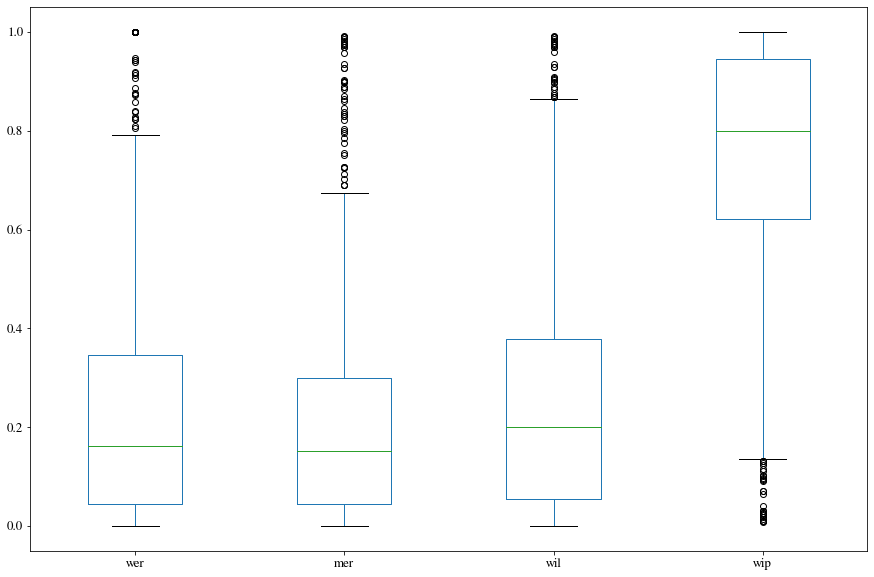

In [35]:
df = pd.read_csv(filename, names=columns, index_col=False)
df.loc[df.wer > 1, 'wer'] = 1
df[metrics].plot.box(figsize=(15, 10))

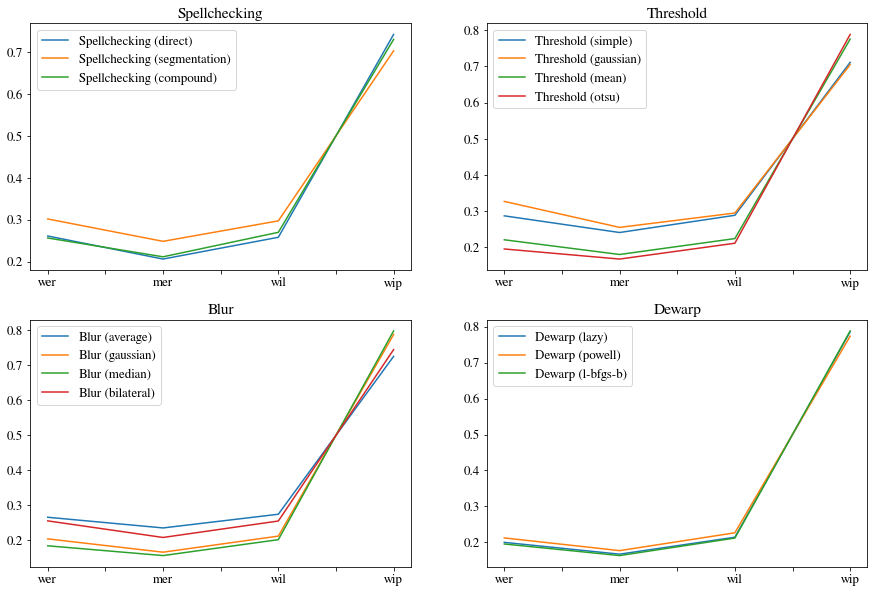

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i in range(1, 4):
    df[metrics][i::15].mean().plot(ax=axes[0, 0])
    
for i in range(4, 8):
    df[metrics][i::15].mean().plot(ax=axes[0, 1])
    
for i in range(8, 12):
    df[metrics][i::15].mean().plot(ax=axes[1, 0])
    
for i in range(12, 15):
    df[metrics][i::15].mean().plot(ax=axes[1, 1])
    
axes[0, 0].set_title('Spellchecking')
axes[0, 1].set_title('Threshold')
axes[1, 0].set_title('Blur')
axes[1, 1].set_title('Dewarp')

axes[0, 0].legend(legends[1:4])
axes[0, 1].legend(legends[4:8])
axes[1, 0].legend(legends[8:12])
axes[1, 1].legend(legends[12:15])

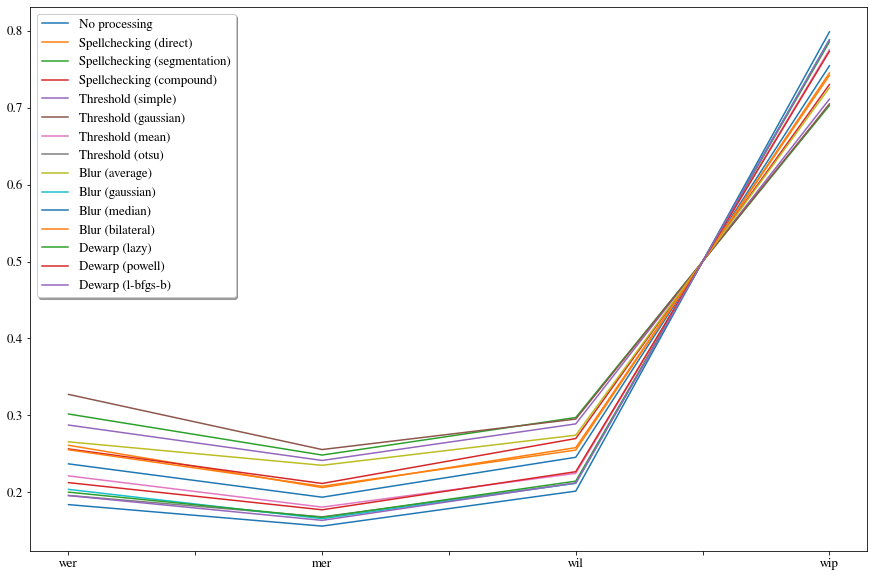

In [34]:
results = pd.DataFrame(columns=metrics_time)

for i in range(15):
    mean = df[metrics_time][i::15].mean().rename(legends[i])
    results = results.append(mean)
    mean[metrics].plot(figsize=(15, 10))
plt.legend(legends, fancybox=True, shadow=True)

Text(0.5, 1.0, 'Word Information Preserved (WIP)')

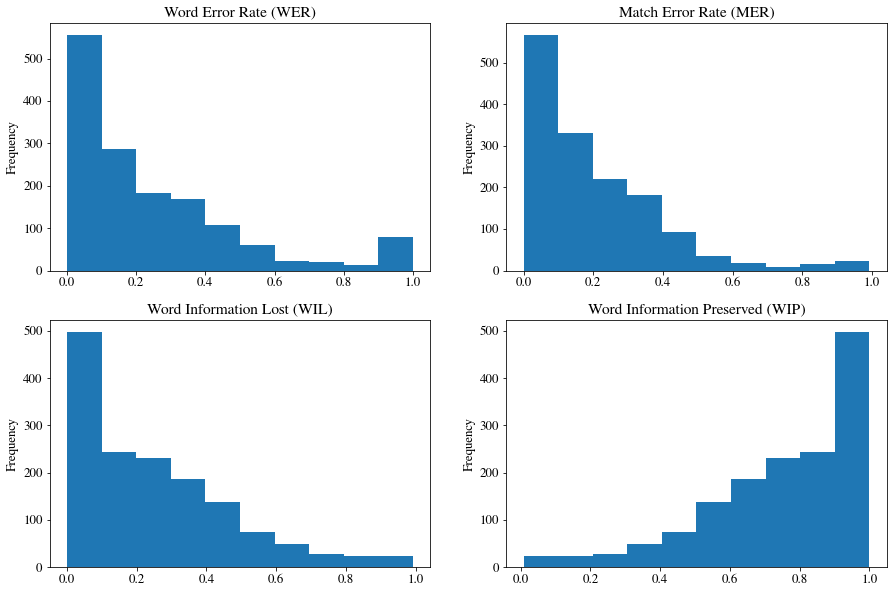

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

df['wer'].plot.hist(ax=axes[0, 0])
df['mer'].plot.hist(ax=axes[0, 1])
df['wil'].plot.hist(ax=axes[1, 0])
df['wip'].plot.hist(ax=axes[1, 1])

axes[0, 0].set_title('Word Error Rate (WER)')
axes[0, 1].set_title('Match Error Rate (MER)')
axes[1, 0].set_title('Word Information Lost (WIL)')
axes[1, 1].set_title('Word Information Preserved (WIP)')

Text(0.5, 1.0, 'Word Information Preserved (WIP)')

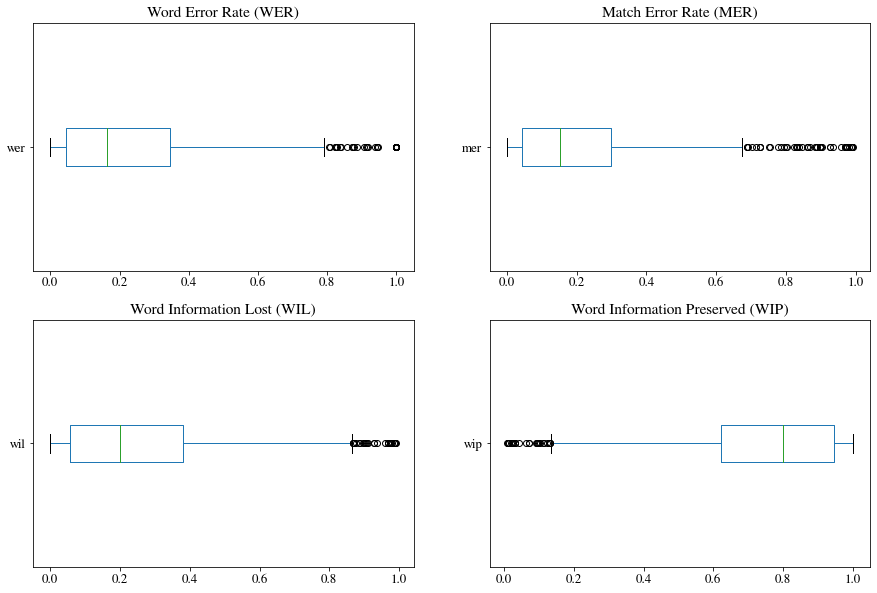

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

df['wer'].plot.box(ax=axes[0, 0], vert=False)
df['mer'].plot.box(ax=axes[0, 1], vert=False)
df['wil'].plot.box(ax=axes[1, 0], vert=False)
df['wip'].plot.box(ax=axes[1, 1], vert=False)

axes[0, 0].set_title('Word Error Rate (WER)')
axes[0, 1].set_title('Match Error Rate (MER)')
axes[1, 0].set_title('Word Information Lost (WIL)')
axes[1, 1].set_title('Word Information Preserved (WIP)')

In [22]:
results

,wer,mer,wil,wip,time
No processing,0.236891,0.193541,0.245466,0.754534,6.465635
Spellchecking (direct),0.261058,0.206050,0.258003,0.741997,8.607419
Spellchecking (segmentation),0.301717,0.248339,0.297171,0.702829,7.608705
Spellchecking (compound),0.256305,0.211407,0.269841,0.730159,6.406634
Threshold (simple),0.287350,0.241329,0.288872,0.711128,4.400169
Threshold (gaussian),0.327223,0.255505,0.295137,0.704863,6.591420
Threshold (mean),0.221237,0.180660,0.224604,0.775396,6.301038
Threshold (otsu),0.195864,0.168029,0.211728,0.788272,5.320047
Blur (average),0.265557,0.235019,0.274194,0.725806,6.698081
Blur (gaussian),0.203736,0.165655,0.211659,0.788341,7.214412


<AxesSubplot:>

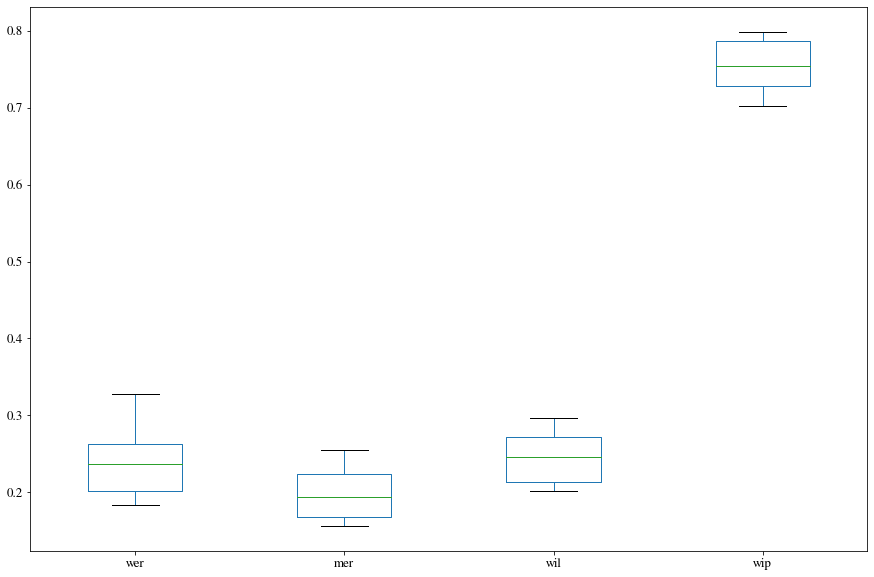

In [28]:
results[metrics].plot.box(figsize=(15, 10))

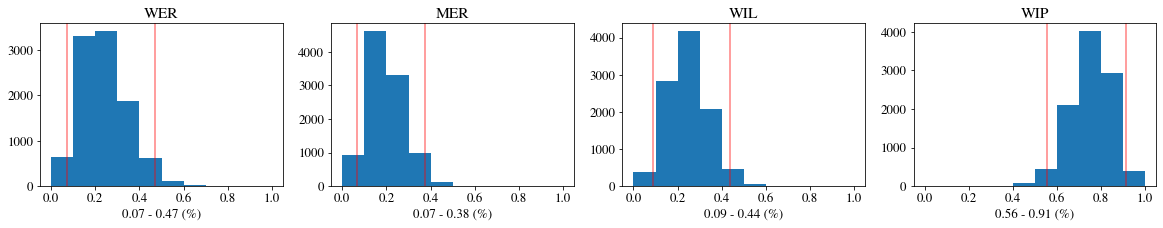

In [30]:
# Confidence Interval
fig, axes = plt.subplots(1, 4, figsize=(20, 3))

for i, metric in enumerate(metrics):
    sample = []
    for _ in range(10000):
        bootstrap = np.random.choice(df[metric], 6, replace=True)
        sample.append(bootstrap.mean())

    inf, sup = np.percentile(sample, 2.5) , np.percentile(sample, 97.5)
    label = f"{round(inf, 2)} - {round(sup, 2)} (%)"
    
    axes[i].hist(sample, range=(0, 1))
    axes[i].axvline(inf, color='r', alpha=0.5)
    axes[i].axvline(sup, color='r', alpha=0.5)
    
    axes[i].set_xlabel(label);
    axes[i].set_title(metric.upper());


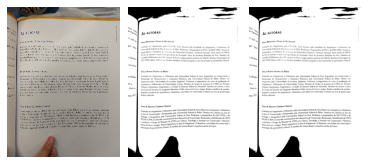

In [13]:
path = '../data/images/'
images = ['book.jpg', 'book_thresh.png', 'book_thresh.png']

fig, axes = plt.subplots(1, 3, figsize=(5, 5), constrained_layout=True)
for i, image in enumerate(images):
    img = cv2.imread(path + image)[:,:,::-1]
    axes[i].imshow(img)
    axes[i].axis('off')
# plt.savefig('tesseract_pipe.eps', format='eps')